In [84]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def mse_calc(X, w, Y):
    y_pred = np.dot(X,w)
    return (sum((Y - y_pred) ** 2)) / len(Y)

In [139]:
X, Y, coef = datasets.make_regression(n_samples = 1000, n_features = 3, n_informative = 3, n_targets = 1, 
                                      noise = 5, coef = True, random_state = 11)

__1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регулизации.__

In [145]:
def Lasso(X, y, iter, eta=2e-2, reg =1e-8):
    W =np.random.randn(X.shape[1])
    
    for step in range(iter):
        y_pred = np.dot(X,W)
        mse_err = mse_calc(X, W, y)
        
        dQ = 2/X.shape[0] * X.T @ (y_pred - y) + reg * np.sign(W)       
        W -= eta * dQ
        
        if step % 100 == 0:
            print(f'Iteration {step} -- W: {W} -- MSE: {mse_err}')
    print(f'MSE: {round(mse_err,6)} на {iter} итерации, коэффициеты - {W}')

In [146]:
Lasso(X,Y, iter = 1000)

Iteration 0 -- W: [-0.45870201  6.33289728  2.92632965] -- MSE: 15412.620063245462
Iteration 100 -- W: [ 1.86114947 94.67107209 78.10954194] -- MSE: 28.980778651478094
Iteration 200 -- W: [ 2.12274965 95.92276725 79.4598452 ] -- MSE: 25.078630644769444
Iteration 300 -- W: [ 2.13098698 95.94056212 79.48468344] -- MSE: 25.077516054026276
Iteration 400 -- W: [ 2.13119361 95.94081627 79.48514947] -- MSE: 25.07751569704316
Iteration 500 -- W: [ 2.13119833 95.94081992 79.48515835] -- MSE: 25.077515696918102
Iteration 600 -- W: [ 2.13119843 95.94081997 79.48515852] -- MSE: 25.077515696917985
Iteration 700 -- W: [ 2.13119843 95.94081997 79.48515853] -- MSE: 25.077515696917953
Iteration 800 -- W: [ 2.13119843 95.94081997 79.48515853] -- MSE: 25.077515696917946
Iteration 900 -- W: [ 2.13119843 95.94081997 79.48515853] -- MSE: 25.077515696917995
MSE: 25.077516 на 1000 итерации, коэффициеты - [ 2.13119843 95.94081997 79.48515853]


__2. Можно ли применить к одному и тому же признаку сразу и нормализацию и стандартизацию?__

С одной стороны можно, если сперва стандартизировать (оставляем распределение, только смещаем мат ожидание о 0 и std в 1), а потом нормализуем, чтобы привести все числа в [0;1]. Если наоборот, то мы, меняя немного распределение нормализацией, будем смещать его к заданным критериям, но резон в таком?

С другой стороны, стандартизация переводит n-мерные данные в вектор, а нормализация - в n-мерный единичный гиперкуб, и получить из вектора куб с той же точностью данных невозможно (если сначала стандартизировать, а после нормализовать). 

__3. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.__

In [113]:
# Генерируем датасет, где много наблюдений
X_large, Y_large, coef_large = datasets.make_regression(n_samples = 100000, n_features = 7, n_informative = 6, n_targets = 1, 
                                      noise = 5, coef = True, random_state = 11)

In [114]:
# Генерируем датасет, где мало наблюдений
X_small, Y_small, coef_small = datasets.make_regression(n_samples = 100, n_features = 2, n_informative = 6, n_targets = 1, 
                                      noise = 5, coef = True, random_state = 11)

In [127]:
def gradient_descent(X, Y, max_iter, epsilon = 1e-6, eta = 2e-2, weight_dist = np.inf, random_seed = 11):
    %time
    num_objects = X.shape[0]
    np.random.seed(random_seed) # фиксируем веса
    W =np.random.randn(X.shape[1])
    
    mse = [] # список для ошибок
    w_list = [W.copy()] # список для весов
    iter = 0 # счетчик итераций
    
    while weight_dist > epsilon and iter < max_iter:
        
        # предсказания
        y_pred = np.dot(X,W)

        # пересчёт весов
        Qd = 2/num_objects * X.T @ (y_pred-Y)
        new_w = W - eta * Qd
        w_list.append(new_w)

         # Считаем разницу по весам
        weight_dist = np.linalg.norm(new_w - W, ord=2)
        
        #ошибка
        mse_err = mse_calc(X, new_w, Y)
        mse.append(mse_err)
        
        # обновление итерации
        iter+= 1
        W = new_w
        
    print(f'MSE: {round(mse[-1],6)} на {iter} итерации, коэффициеты - {w_list[-1]}')
    return mse, iter

In [128]:
def stochastic_gradient_descent(X, Y, max_iter, batch,epsilon = 1e-6, eta = 2e-2, weight_dist = np.inf, random_seed = 11):
    %time
    num_objects = X.shape[0]
    np.random.seed(random_seed) # фиксируем веса
    W =np.random.randn(X.shape[1])
    
    mse = [] # список для ошибок
    w_list = [W.copy()] # список для весов
    iter = 0 # счетчик итераций

    while weight_dist > epsilon and iter < max_iter:
        
        # выбираем случайные X 
        train_ind = np.random.randint(X.shape[0], size = batch)
        
        # предсказания
        y_pred = np.dot(X[train_ind], W)
        
        # пересчёт весов
        dQ = 2/batch * X[train_ind].T @ (y_pred-Y[train_ind])
        new_w = W - eta * dQ
        w_list.append(new_w)

        # Считаем разницу по весам
        weight_dist = np.linalg.norm(new_w - W, ord=2)

        #ошибка
        mse_err = mse_calc(X[train_ind], new_w, Y[train_ind])
        mse.append(mse_err)

        # обновление итерации
        iter+= 1
        W = new_w
           
    print(f'MSE: {round(mse[-1],6)} на {iter} итерации, коэффициеты - {w_list[-1]}')
    return mse, iter

In [129]:
grad_mse_small, grad_iter_small = gradient_descent(X_small, Y_small, max_iter = 1e4)
sgd_mse_small, sgd_iter_small = stochastic_gradient_descent(X_small, Y_small, max_iter = 1e4,batch=5)

Wall time: 0 ns
MSE: 24.03314 на 424 итерации, коэффициеты - [59.68580413 59.0117762 ]
Wall time: 0 ns
MSE: 40.430029 на 10000 итерации, коэффициеты - [59.90512786 58.91478937]


In [131]:
grad_mse_large, grad_iter_large = gradient_descent(X_large, Y_large, max_iter = 1e4)
sgd_mse_large, sgd_iter_large = stochastic_gradient_descent(X_large, Y_large, max_iter = 1e4, batch=15)

Wall time: 0 ns
MSE: 24.955232 на 368 итерации, коэффициеты - [ 1.78876993e+01  1.49904380e+01  6.47291397e+01 -5.57686694e-03
  6.60050096e+00  3.18783227e+01  1.05896825e+01]
Wall time: 0 ns
MSE: 31.55411 на 10000 итерации, коэффициеты - [18.01887786 15.58065558 64.582435    0.10852079  6.33740472 31.94146724
 10.85043073]


Text(0.5, 1.0, 'Сходимость MSE на маленьком датасете')

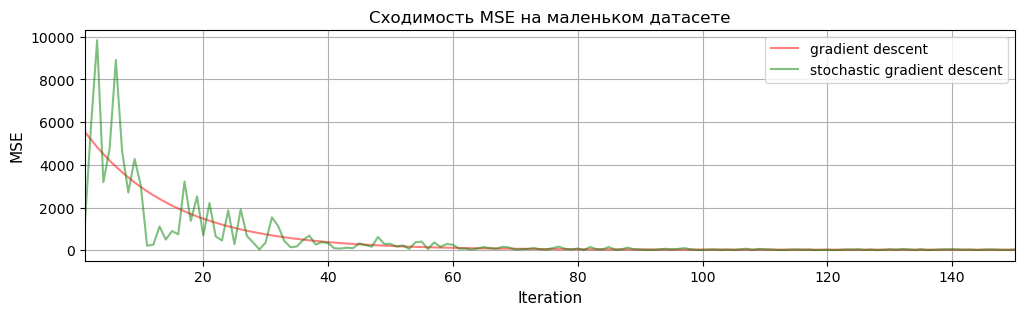

In [137]:
# обычный град. спуск
x_1 = np.arange(1,grad_iter_small + 1)
y_1 = np.array(grad_mse_small)

# sgd
x_2 = np.arange(1,sgd_iter_small + 1)
y_2 = np.array(sgd_mse_small)

plt.rcParams["figure.figsize"] = (12,3)
plt.xlabel("Iteration",fontsize=11)
plt.ylabel("MSE",fontsize=11)
plt.xlim(1,150)
plt.grid()
plt.plot(x_1,y_1, c= 'r', alpha = 0.5, label= 'gradient descent')
plt.plot(x_2,y_2, c= 'g',alpha = 0.5, label= 'stochastic gradient descent')
plt.legend(loc="upper right")
plt.title('Сходимость MSE на маленьком датасете')

Text(0.5, 1.0, 'Сходимость MSE на большом датасете')

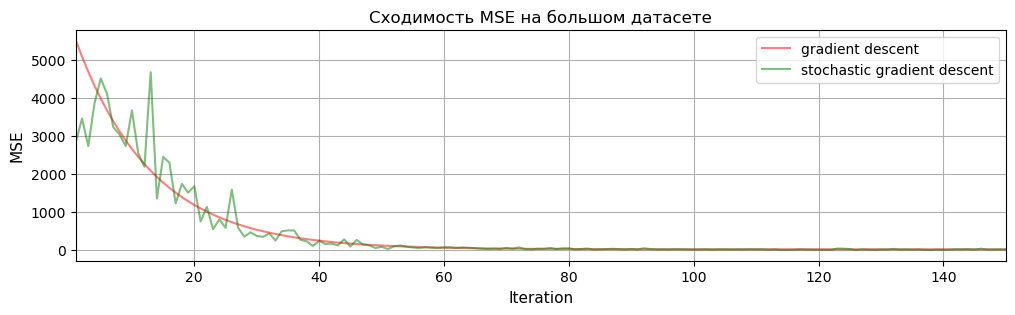

In [138]:
# обычный град. спуск
x_1 = np.arange(1,grad_iter_large + 1)
y_1 = np.array(grad_mse_large)

# sgd
x_2 = np.arange(1,sgd_iter_large + 1)
y_2 = np.array(sgd_mse_large)

plt.rcParams["figure.figsize"] = (12,3)
plt.xlabel("Iteration",fontsize=11)
plt.ylabel("MSE",fontsize=11)
plt.xlim(1,150)
plt.grid()
plt.plot(x_1,y_1, c= 'r', alpha = 0.5, label= 'gradient descent')
plt.plot(x_2,y_2, c= 'g',alpha = 0.5, label= 'stochastic gradient descent')
plt.legend(loc="upper right")
plt.title('Сходимость MSE на большом датасете')

__В данной ситуации нет разницы между обычным и стахостическим градиентным бустингом, так как в обоих случаях оба приблизительно в одно и то же время показывают незначительные изменения от рядом лежащих показаний (приблизительно с 50/60 итерации), хотя на маленьком датасете SGD начинает получать меньшую ошибку раньше.__